# Model OVERALL_RESULT variable

Refactored code from Week 3 based on mentor feedback

The provided models are designed to quantify the 'error' in the dataset, i.e. to quantify the proportion of the overall-results variable that cannot be explained by the data provided by the client. 

This model is created to comprehend the overall_results variable. If the dataset was perfect, the provided emissions data should explain the overall_results by 100%, as the overall_results are the results of the emissions test. 
However, the EDA of some of the features showed that some of the variables suffer from lots of missing data, unhomogenous formats, entering mistakes and / or biased checking stations, mechanics and software versions. The models quantify the proportion of the unexplained variance. 

### MODEL 1: 
* exclude all the variables that are not part of the checking procedure and were probably not used to obtain the results
* exclude all the variables containing NAN (most of them are mostly containing NAN anyway)
* scale the continuous features (MinMaxScaler), dummy the categorical features

ROC AUC Score is 0.8341440791139727

### MODEL 2:
* following model 1, plus
* all VIN are unique, i.e. cars that are tested multiple times appear only once in the dataset
(reduces dataset by about 63,15 % from 346783 to 127791 rows)

ROC AUC Score is 0.8772584476785295

### MODEL 3:
* following model 2, plus
* OBD (On-Board-Diagnostic Tools) are added as a feature

ROC AUC Score is 0.9999872801165947

In [54]:
#where am I?
import os
path = os.getcwd()
print(path)

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data


In [2]:
#go to path where data_prep and baseline_model are
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab


In [3]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep, baseline_model


In [4]:
#go to data path locally 
%cd C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data

C:\Users\hanna\PycharmProjects\berlindslab\ds-lab\data


In [5]:
df = pd.read_csv("../data/sample.csv", lineterminator='\n')

c:\users\hanna\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


which columns do we have in our dataset?

In [23]:
#cols = df.columns.tolist()
#print(cols)
#df_subset=df

In [7]:
# get columns for data exploration
#df_subset = df[["ENGINE_SIZE","E_IDLE_DCF","E_IDLE_RPM","E_IDLE_CO_RESULT","E_HIGH_CO_RESULT","E_IDLE_HC_RESULT","E_HIGH_HC_RESULT","MODEL","RecordID", "TEST_SDATE", "TEST_EDATE", "ODOMETER", "VEHICLE_TYPE", "MODEL_YEAR", "FUEL_TYPE", "GVW_TYPE", "OVERALL_RESULT"]]
df_subset = df

In [8]:
# get car age
df_subset = data_prep.get_car_age(df_subset)
df_subset.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,...,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,CAR_AGE
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,...,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r,11
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,...,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r,5
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,...,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r,16
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,...,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r,20
4,384955,1326,4492858.0,IS171,W052,22095231,I,I,2004-12-29 17:00:00,2004-12-29 17:03:00,...,Nguyen,Kenny,T,NaN,NaN,0.0,IS171,W052,2006-01-31 16:06:03\r,8


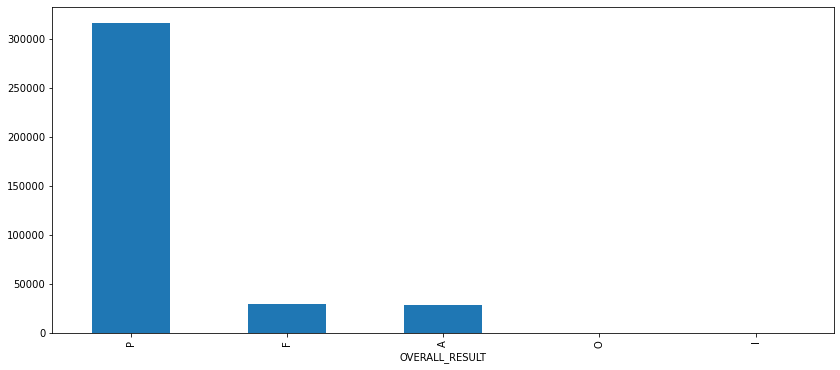

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('OVERALL_RESULT').size().sort_values(ascending=False).head(60).plot.bar()

In [10]:
df_subset.OVERALL_RESULT.value_counts()

P    316732
F     30051
A     28701
O        10
I         9
Name: OVERALL_RESULT, dtype: int64

In [11]:
# Keep rows with only P or F in OVERALL RESULT
df_subset = data_prep.keep_pass_fail(df_subset)

In [12]:
df_subset.shape

(346783, 128)

### exploring variables

In [24]:
#df_subset.OBDII_AFFECT_OVERALL.value_counts()

In [25]:
#fig, ax = plt.subplots(figsize=(14,6))
#df_subset.groupby('OBDII_AFFECT_OVERALL').size().sort_values(ascending=False).head(60).plot.bar()

## Model without NaN
Model with NaN doesn't run

### exclude all columns with nan

In [15]:
df_features = df_subset[['ESC',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_2',
 'E_IDLE_HC_2',
 'E_IDLE_HC_DCF_2',
 'E_IDLE_CO_2',
 'E_IDLE_CO_DCF_2',
 'E_RESULT_STRING',
 'V_SMOKE1',
 'V_SMOKE2',
 'V_GASCAP',
 'V_CAT',
 'V_RESULT',
 'ONLINE_STATUS',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT']]

In [16]:
not_nan_cols = [i for i in df_features.columns if df_features[i].notna().all()]

In [17]:
not_nan_cols

['ESC',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_2',
 'E_IDLE_HC_2',
 'E_IDLE_HC_DCF_2',
 'E_IDLE_CO_2',
 'E_IDLE_CO_DCF_2',
 'E_RESULT_STRING',
 'V_SMOKE1',
 'V_SMOKE2',
 'V_GASCAP',
 'V_CAT',
 'V_RESULT',
 'ONLINE_STATUS',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT']

In [18]:
target = data_prep.encode_target(df_subset["OVERALL_RESULT"])

In [19]:
# find out which of the df_features variables are categorical ("object") to be able to "dummy" them
df_obj = df_features.select_dtypes(include=['object'])
cols = df_obj.columns.tolist()
print(cols)

['E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT']


In [20]:
# 2. attempt: dont use V, only result
cat_features = ['E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT']
#cat_features = ['E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'KOEO_RESULT', 'KOER_RESULT', 'OBD_RDY_RESULT', 'OBD_FLT_CODES', 'OBD_FLT_RESULT', 'OBD_RESULT', 'R_EGR', 'R_ELECTRICAL', 'R_EVAP_CONTROL', 'R_EXHAUST', 'R_IGNITION', 'R_INTAKE', 'R_ENGINE', 'R_PCV', 'OBDII_AFFECT_OVERALL', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT', 'FAILED_IDLE_RPM']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     95092
           1       0.40      0.56      0.46      8943

    accuracy                           0.89    104035
   macro avg       0.68      0.74      0.70    104035
weighted avg       0.91      0.89      0.90    104035

ROC AUC Score is 0.8345245518903759
Cross-validation scores: [0.83621627 0.84027376 0.84064954 0.83780761 0.84327574]
Mean cross-validation score: 0.84


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

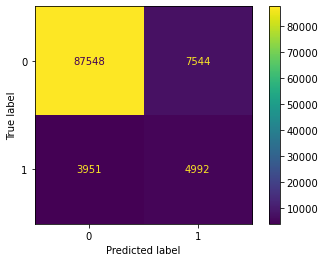

In [22]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=1000)

In [113]:
df_subset[df_subset.columns[df_subset.isnull().any()]].isnull().sum() * 100 / df_subset.shape[0]

ANALYZER_NUM                0.003460
VID_TEST_TYPE              16.189375
VEH_LICENSE                 0.016148
GVW_TYPE                    0.010093
MODEL                       0.001730
EMISS_COST                  0.036046
KOEO_RESULT                15.261994
KOER_RESULT                15.561028
OBD_RDY_MISFIRE            15.489225
OBD_RDY_FUEL               15.489225
OBD_RDY_COMPONENT          15.489225
OBD_RDY_CAT                15.489225
OBD_RDY_CAT_HEATED         15.489225
OBD_RDY_EVAP               15.489225
OBD_RDY_SEC_AIR            15.489225
OBD_RDY_AIR_COND           15.489225
OBD_RDY_O2_SENSOR          15.489225
OBD_RDY_O2_HEATER          15.489225
OBD_RDY_EGR                15.489225
OBD_RDY_RESULT             15.489225
OBD_PID                    15.437896
OBD_PCM_ID                 16.845981
OBD_VIN                    48.574469
OBD_FLT_CODES              91.834663
OBD_FLT_RESULT             15.422325
OBD_MIL_STATUS             15.494416
OBD_RESULT                 15.276412
A

In [115]:
df_features[df_features.columns[df_features.isnull().any()]].isnull().sum() * 100 / df_features.shape[0]

KOEO_RESULT              15.261994
KOER_RESULT              15.561028
OBD_RDY_MISFIRE          15.489225
OBD_RDY_FUEL             15.489225
OBD_RDY_COMPONENT        15.489225
OBD_RDY_CAT              15.489225
OBD_RDY_CAT_HEATED       15.489225
OBD_RDY_EVAP             15.489225
OBD_RDY_SEC_AIR          15.489225
OBD_RDY_AIR_COND         15.489225
OBD_RDY_O2_SENSOR        15.489225
OBD_RDY_O2_HEATER        15.489225
OBD_RDY_EGR              15.489225
OBD_RDY_RESULT           15.489225
OBD_PID                  15.437896
OBD_FLT_CODES            91.834663
OBD_FLT_RESULT           15.422325
OBD_MIL_STATUS           15.494416
OBD_RESULT               15.276412
ABORT_CODE              100.000000
R_TOTAL_COST             97.050893
R_EGR                    99.871678
R_ELECTRICAL             99.770173
R_EVAP_CONTROL           99.435959
R_EXHAUST                99.841111
R_IGNITION               99.702696
R_INTAKE                 99.629451
R_ENGINE                 99.948671
R_PCV               

## Model with unique vin
all repeated measurements of cars are deleted

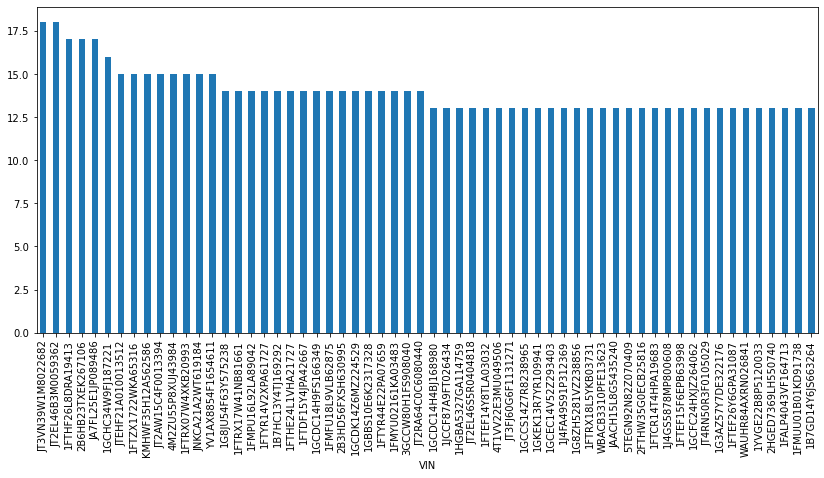

In [36]:
fig, ax = plt.subplots(figsize=(14,6))
df_subset.groupby('VIN').size().sort_values(ascending=False).head(60).plot.bar()

In [37]:
df_vin=df_subset.drop_duplicates(['VIN'])

In [38]:
df_vin

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,...,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,CAR_AGE
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,...,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r,11
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,...,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r,5
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,...,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r,20
4,384955,1326,4492858.0,IS171,W052,22095231,I,I,2004-12-29 17:00:00,2004-12-29 17:03:00,...,Nguyen,Kenny,T,NaN,NaN,0.0,IS171,W052,2006-01-31 16:06:03\r,8
5,163546,271,4427054.0,IS139,W102,23867222,I,I,2004-07-23 11:10:00,2004-07-23 11:12:00,...,FRIEND,RICHARD,NaN,NaN,NaN,0.0,IS139,W102,2006-01-17 16:38:37\r,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375487,4587936,9570,8812838.0,IS455,W103,AC086107,I,NaN,2019-12-31 14:10:19,2019-12-31 14:11:59,...,HICKS,JOHN,L,NaN,NaN,0.0,IS455,W103,2019-12-31 13:12:52\r,5
375491,4588003,4327,8821821.0,IS397,W165,AC086625,I,NaN,2019-12-31 14:50:15,2019-12-31 14:54:41,...,VALADEZRODRIGUEZ,MARCOS,NaN,3.6L,NaN,0.0,IS397,W165,2019-12-31 13:57:30\r,5
375494,4588071,4328,8821822.0,IS397,W165,AC086625,I,NaN,2019-12-31 15:40:19,2019-12-31 15:45:25,...,VALADEZRODRIGUEZ,MARCOS,NaN,2.0L,NaN,0.0,IS397,W165,2019-12-31 14:49:42\r,4
375495,4588092,478,8808641.0,IR044,W780,AC083775,I,NaN,2019-12-31 15:59:13,2019-12-31 16:02:14,...,NGUYEN,DUC,D,1.8L,NaN,0.0,IR044,W780,2019-12-31 15:03:01\r,6


In [39]:
df_subset.shape

(346783, 128)

In [40]:
df_vin.shape

(127791, 128)

In [41]:
target = data_prep.encode_target(df_vin["OVERALL_RESULT"])

In [42]:
df_features = df_vin[['ESC',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_2',
 'E_IDLE_HC_2',
 'E_IDLE_HC_DCF_2',
 'E_IDLE_CO_2',
 'E_IDLE_CO_DCF_2',
 'E_RESULT_STRING',
 'V_SMOKE1',
 'V_SMOKE2',
 'V_GASCAP',
 'V_CAT',
 'V_RESULT',
 'ONLINE_STATUS',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT']]

In [43]:
cat_features = ['E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     36069
           1       0.37      0.67      0.48      2269

    accuracy                           0.91     38338
   macro avg       0.68      0.80      0.72     38338
weighted avg       0.94      0.91      0.92     38338

ROC AUC Score is 0.8772584476785295
Cross-validation scores: [0.87706436 0.88541804 0.88887912 0.88326125 0.87881103]
Mean cross-validation score: 0.88


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

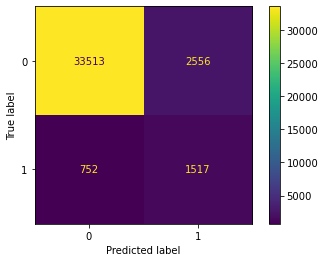

In [44]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=1000)

## Model without NaN, without repeated VIN, but with OBD RESULTS

In [45]:
df_features = df_vin[['ESC',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_2',
 'E_IDLE_HC_2',
 'E_IDLE_HC_DCF_2',
 'E_IDLE_CO_2',
 'E_IDLE_CO_DCF_2',
 'E_RESULT_STRING',
 'V_SMOKE1',
 'V_SMOKE2',
 'V_GASCAP',
 'V_CAT',
 'V_RESULT',
 'ONLINE_STATUS',
 'E_HIGH_CO_RESULT',
 'E_HIGH_HC_RESULT',
 'E_IDLE_CO_RESULT',
 'E_IDLE_HC_RESULT','OBD_RESULT','OVERALL_RESULT']]

In [46]:
df_features = df_features.dropna()

In [47]:
df_features.shape

(108843, 52)

In [48]:
target = data_prep.encode_target(df_features["OVERALL_RESULT"])

In [49]:
target.shape

(108843,)

In [50]:
df_features = df_features.drop(['OVERALL_RESULT'], axis=1)

In [51]:
df_features

,ESC,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,...,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,ONLINE_STATUS,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,OBD_RESULT
1,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,N,N,N,N,1,N,N,N,N,P
4,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,N,N,N,N,1,N,N,N,N,P
5,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,N,N,N,N,1,N,N,N,N,P
7,20.0,1,1,0.0,0,0.0,0.0,0,0,100,...,N,N,N,N,1,N,N,N,N,P
11,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,N,N,N,N,1,N,N,N,N,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375487,20.0,1,1,0.0,0,0.0,0.0,0,0,100,...,P,N,P,P,1,N,N,N,N,P
375491,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,P,N,P,P,1,N,N,N,N,P
375494,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,P,N,P,P,1,N,N,N,N,P
375495,6.0,1,1,0.0,0,0.0,0.0,0,0,100,...,P,N,P,P,1,N,N,N,N,P


In [52]:
# 2. attempt: dont use V, only result
cat_features = ['OBD_RESULT','E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT']
#cat_features = ['E_RESULT_STRING', 'V_SMOKE1', 'V_SMOKE2', 'V_GASCAP', 'V_CAT', 'V_RESULT', 'KOEO_RESULT', 'KOER_RESULT', 'OBD_RDY_RESULT', 'OBD_FLT_CODES', 'OBD_FLT_RESULT', 'OBD_RESULT', 'R_EGR', 'R_ELECTRICAL', 'R_EVAP_CONTROL', 'R_EXHAUST', 'R_IGNITION', 'R_INTAKE', 'R_ENGINE', 'R_PCV', 'OBDII_AFFECT_OVERALL', 'E_HIGH_CO_RESULT', 'E_HIGH_HC_RESULT', 'E_IDLE_CO_RESULT', 'E_IDLE_HC_RESULT', 'FAILED_IDLE_RPM']

features_train, features_test, target_train, target_test = data_prep.encode_split_data(cat_features,
                                                                                    data = df_features,
                                                                                    target_series = target,
                                                                                    train_size = .7,
                                                                                    random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31236
           1       1.00      1.00      1.00      1417

    accuracy                           1.00     32653
   macro avg       1.00      1.00      1.00     32653
weighted avg       1.00      1.00      1.00     32653

ROC AUC Score is 0.9999872801165947
Cross-validation scores: [0.99999734 0.99998202 0.99999505 0.9999858  0.99924648]
Mean cross-validation score: 1.0


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

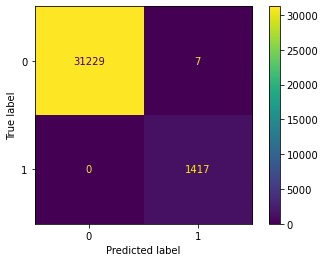

In [53]:
baseline_model.run_baseline_model(features_train, 
                                features_test, 
                                target_train, 
                                target_test, 
                                model = "logreg", 
                                random_state=42, 
                                class_weight="balanced",
                                 max_iter=1000)